## Sources

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

<AxesSubplot:>

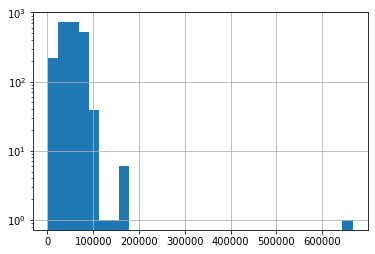

In [23]:
df['Income'].hist(log=True, bins=30)

ValueError: could not convert string to float: 'Graduation'

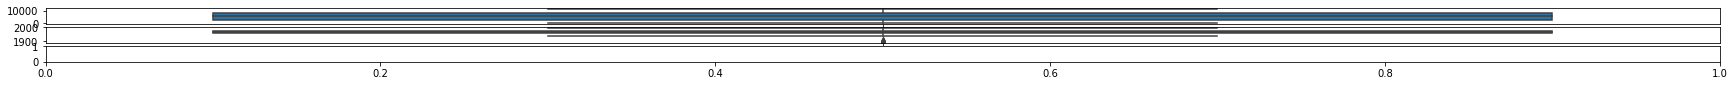

In [27]:
plt.figure(figsize=[30,10])

for i, col_name in enumerate(df.columns):
    plt.subplot(len(df.columns),1,i+1)
    sns.boxplot(data=df[col_name])

In [21]:
df.Dt_Customer.nunique(log=True)

TypeError: nunique() got an unexpected keyword argument 'log'

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


/Users/an/miniforge3/envs/try2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 3.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/an/miniforge3/envs/try2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 11.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/an/miniforge3/envs/try2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 3.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/an/miniforge3/envs/try2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 3.0 results in singular transformations; automatically expanding.
  

array([[<AxesSubplot:xlabel='ID', ylabel='ID'>,
        <AxesSubplot:xlabel='Year_Birth', ylabel='ID'>,
        <AxesSubplot:xlabel='Income', ylabel='ID'>,
        <AxesSubplot:xlabel='Kidhome', ylabel='ID'>,
        <AxesSubplot:xlabel='Teenhome', ylabel='ID'>,
        <AxesSubplot:xlabel='Recency', ylabel='ID'>,
        <AxesSubplot:xlabel='MntWines', ylabel='ID'>,
        <AxesSubplot:xlabel='MntFruits', ylabel='ID'>,
        <AxesSubplot:xlabel='MntMeatProducts', ylabel='ID'>,
        <AxesSubplot:xlabel='MntFishProducts', ylabel='ID'>,
        <AxesSubplot:xlabel='MntSweetProducts', ylabel='ID'>,
        <AxesSubplot:xlabel='MntGoldProds', ylabel='ID'>,
        <AxesSubplot:xlabel='NumDealsPurchases', ylabel='ID'>,
        <AxesSubplot:xlabel='NumWebPurchases', ylabel='ID'>,
        <AxesSubplot:xlabel='NumCatalogPurchases', ylabel='ID'>,
        <AxesSubplot:xlabel='NumStorePurchases', ylabel='ID'>,
        <AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='ID'>,
        <AxesSubpl

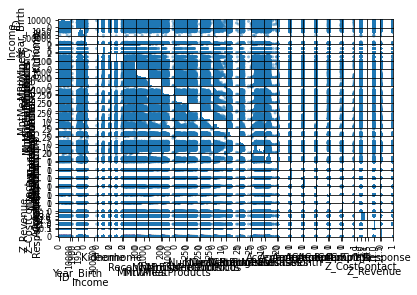

In [15]:
pd.plotting.scatter_matrix(df)